In [33]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

data_cancer = pd.read_csv(r"C:\Users\arjun\Downloads\data.csv")

In [34]:
import pandas as pd
from tabulate import tabulate

data_cancer.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [35]:
pd.DataFrame(data_cancer.columns, columns=["Columns"])

,Columns
0,id
1,diagnosis
2,radius_mean
3,texture_mean
4,perimeter_mean
5,area_mean
6,smoothness_mean
7,compactness_mean
8,concavity_mean
9,concave_points_mean


In [36]:
data_cancer.shape

(569, 32)

In [37]:
data_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
import pandas as pd

data_cancer.astype(str)



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
4,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.0,1479.0,0.111,0.1159,0.2439,0.1389,...,25.45,26.4,166.1,2027.0,0.141,0.2113,0.4107,0.2216,0.206,0.07115
565,926682,M,20.13,28.25,131.2,1261.0,0.0978,0.1034,0.144,0.09791,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
567,927241,M,20.6,29.33,140.1,1265.0,0.1178,0.277,0.3514,0.152,...,25.74,39.42,184.6,1821.0,0.165,0.8681,0.9387,0.265,0.4087,0.124


In [39]:
null_values_df = data_cancer.isnull().sum()
print(null_values_df)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [28]:
import pandas as pd
total_null_values = data_cancer.isnull().sum().sum()
print(total_null_values)


0


In [41]:
import pandas as pd
data_cancer["diagnosis"] = pd.Categorical(data_cancer["diagnosis"])


In [42]:
diagnosis_counts = data_cancer["diagnosis"].value_counts()
print(diagnosis_counts)


diagnosis
B    357
M    212
Name: count, dtype: int64


<Axes: xlabel='diagnosis'>

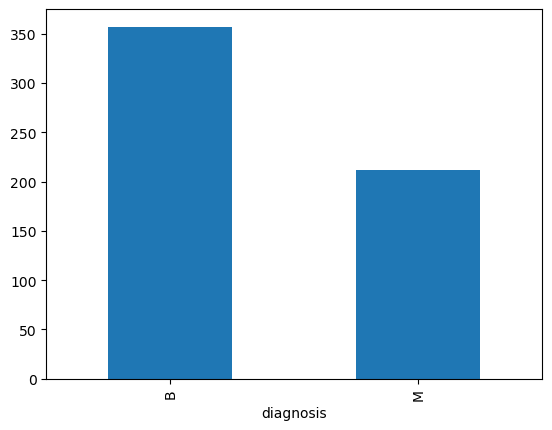

In [44]:

data_cancer["diagnosis"].value_counts().plot(kind="bar")




<Axes: ylabel='count'>

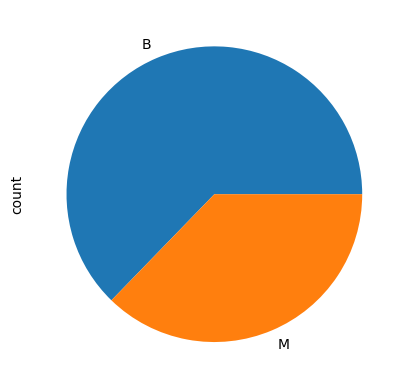

In [45]:

data_cancer["diagnosis"].value_counts().plot(kind="pie")

In [46]:

mode_diagnosis = data_cancer["diagnosis"].mode()[0]
print("Mode:", mode_diagnosis)


Mode: B


In [48]:

diagnosis_table = pd.crosstab(index=data_cancer["diagnosis"], columns="count")


diagnosis_proportions = diagnosis_table / diagnosis_table.sum()

rounded_proportions = round(diagnosis_proportions, 2)

print(rounded_proportions)


col_0      count
diagnosis       
B           0.63
M           0.37


In [50]:
import pandas as pd

data_mean = data_cancer[["diagnosis", "radius_mean", "texture_mean", "perimeter_mean",
                         "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
                         "concave_points_mean", "symmetry_mean", "fractal_dimension_mean"]]


In [51]:
import matplotlib.pyplot as plt

data_melted = pd.melt(data_mean, id_vars="diagnosis", var_name="variable", value_name="value")


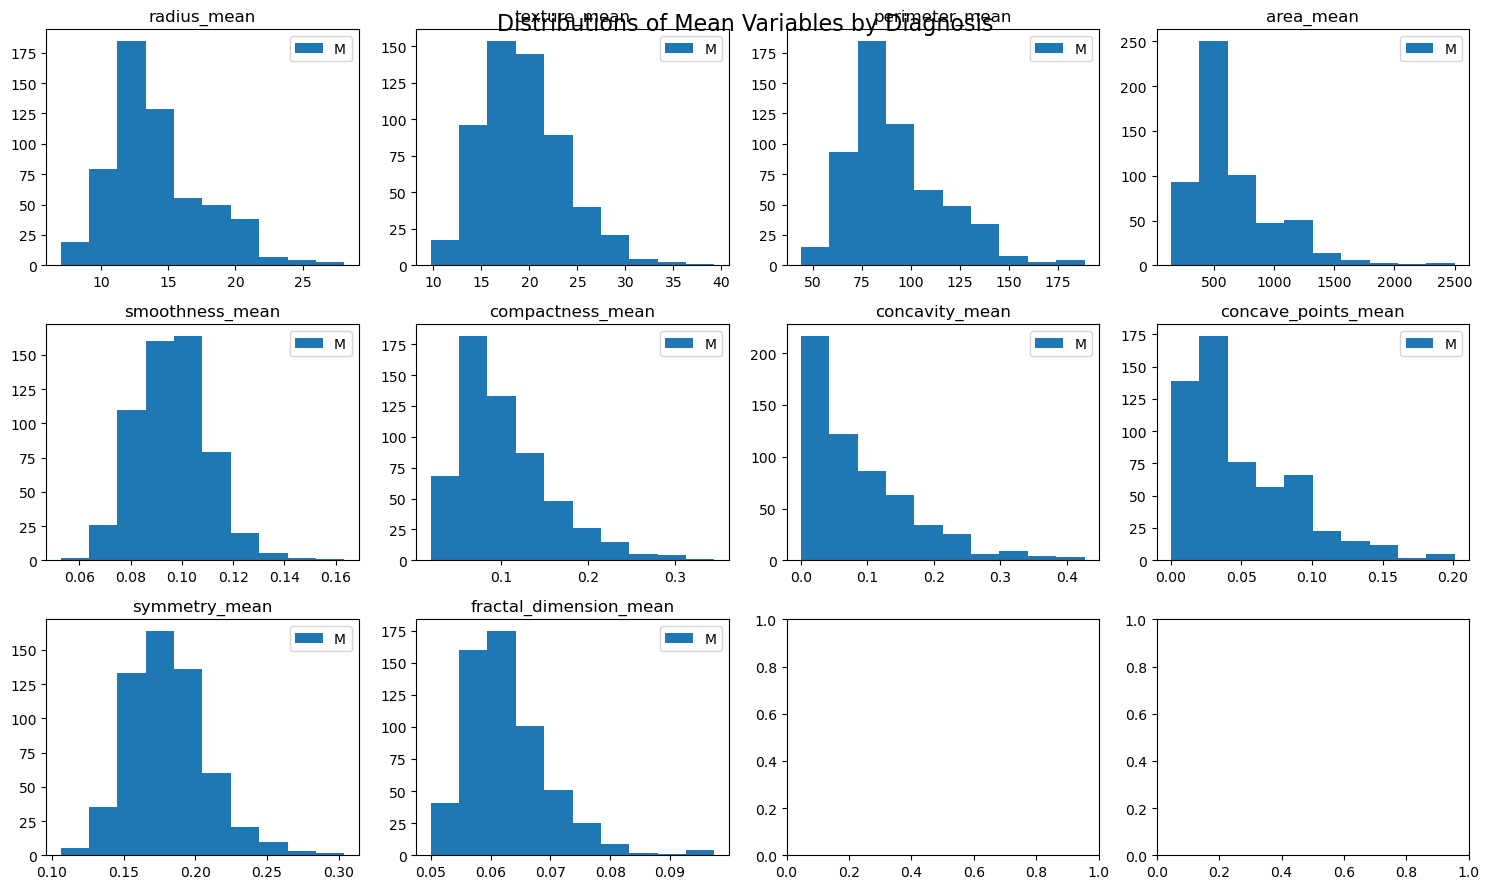

In [52]:

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 9)) 

for i, (variable, ax) in enumerate(zip(data_melted["variable"].unique(), axs.flatten())):
    subset = data_melted[data_melted["variable"] == variable]
    ax.hist(subset["value"], bins=10, alpha=1, label=subset["diagnosis"])
    ax.set_title(variable)
    ax.legend()

plt.tight_layout()
plt.suptitle("Distributions of Mean Variables by Diagnosis", fontsize=16)
plt.show()


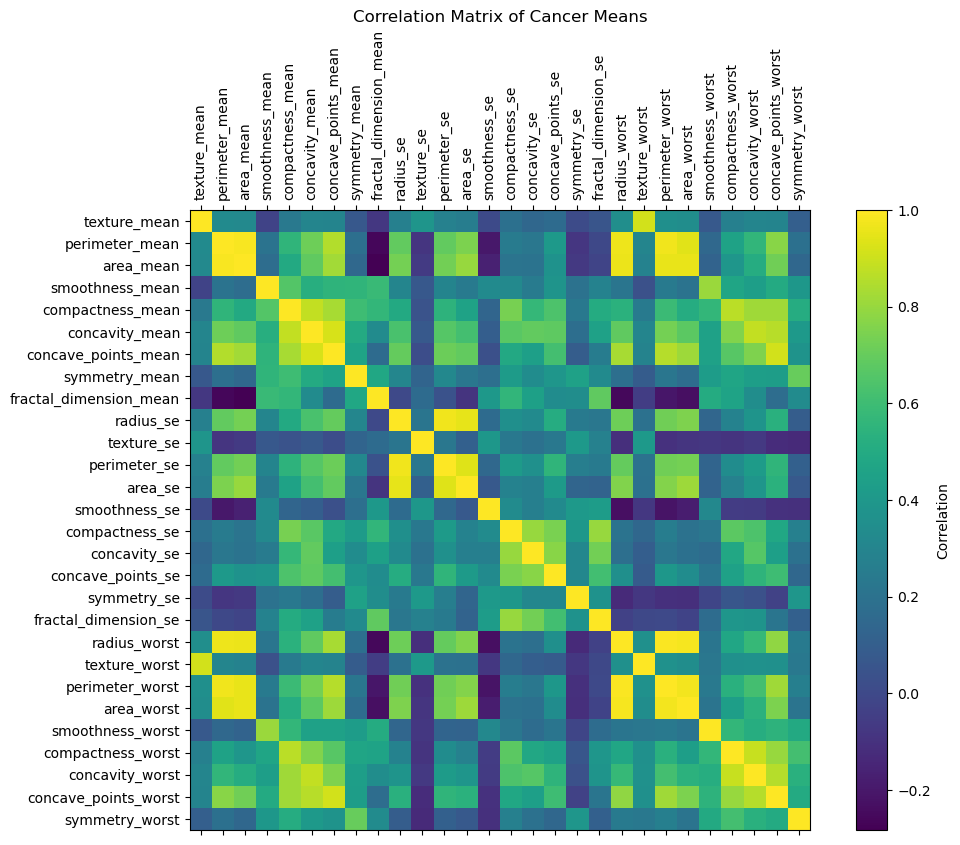

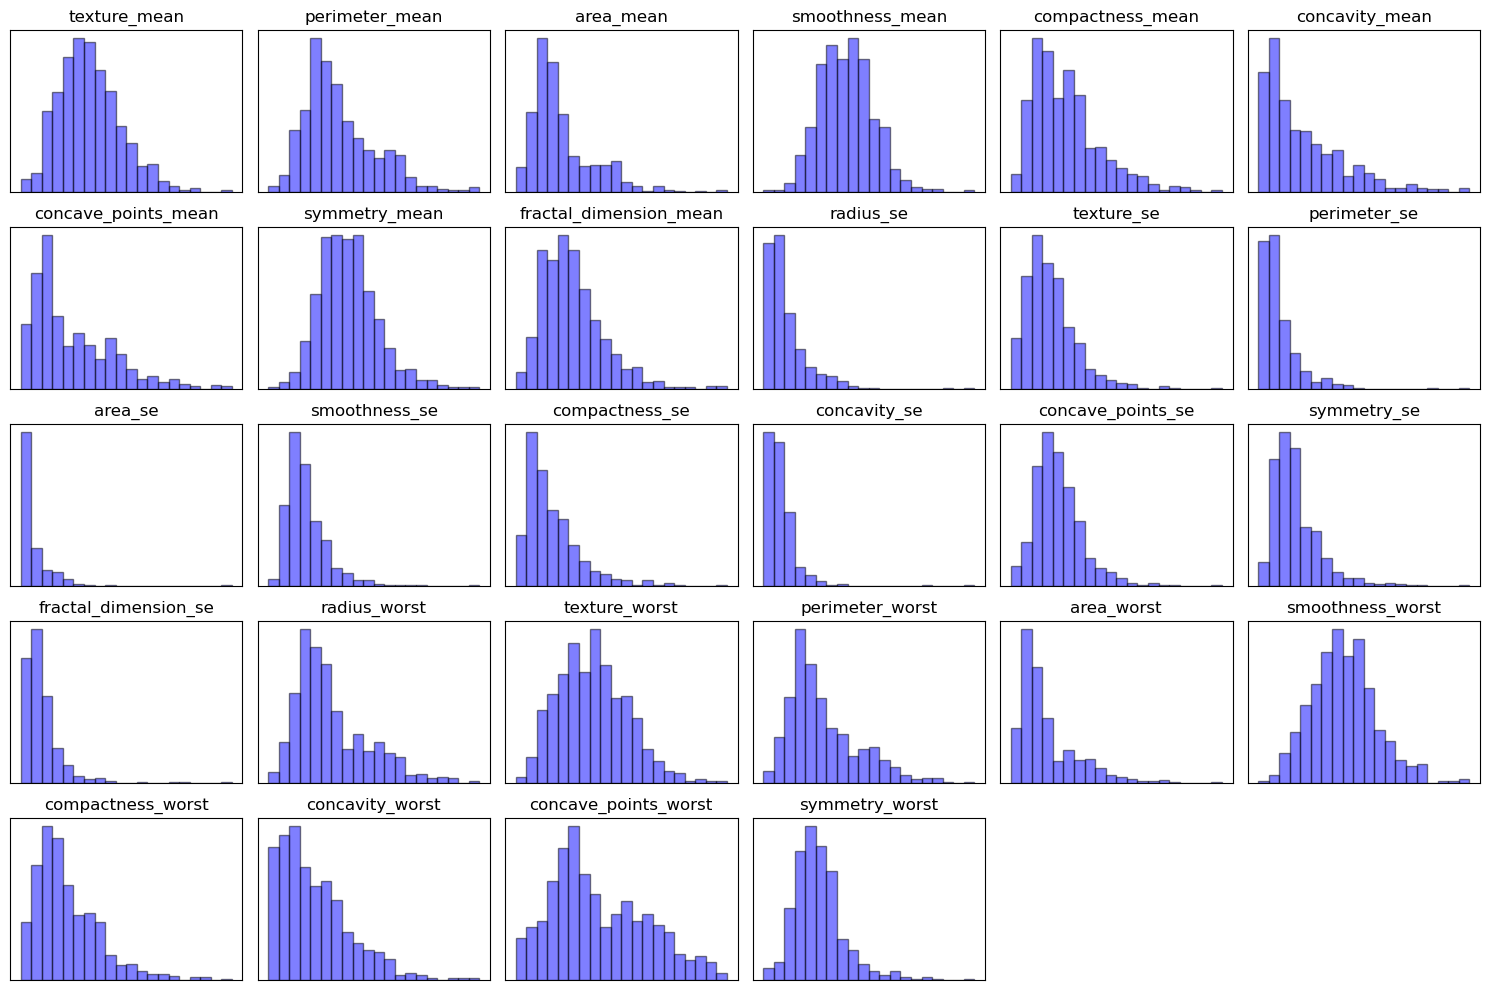

In [55]:

data_subset = data_cancer.iloc[:, 3:31] 


correlation_matrix = data_subset.corr()


plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, cmap="viridis", fignum=1)
plt.colorbar(label="Correlation")
plt.title("Correlation Matrix of Cancer Means")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

plt.figure(figsize=(15, 10))
for i in range(len(data_subset.columns)):
    plt.subplot(5, 6, i + 1)
    plt.hist(data_subset.iloc[:, i], bins=20, alpha=0.5, color='b', edgecolor='black')
    plt.title(data_subset.columns[i])
    plt.xticks([])  
    plt.yticks([]) 

plt.tight_layout()
plt.show()


In [59]:
# Assuming the correct column name is "texture_mean":

# Check for null values:
print(data_cancer["texture_mean"].isna().sum())

# Handle null values (if any):
data_cancer["texture_mean"].fillna("NT", inplace=True)  # Replace with "NT"

# Check for infinite values (if applicable):
print(data_cancer["texture_mean"].value_counts())  # Inspect for "-inf" or "+inf"

# Handle infinite values (if found):
data_cancer.loc[data_cancer["texture_mean"] == "+inf", "texture_mean"] = "NT"
data_cancer.loc[data_cancer["texture_mean"] == "-inf", "texture_mean"] = "NT"

# Alternatively, attempt conversion to numeric (if appropriate):
try:
    data_cancer["texture_mean"] = pd.to_numeric(data_cancer["texture_mean"])
except ValueError as e:
    print("Conversion to numeric failed:", e)
    # Handle the categorical column using methods for categorical data


0
texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64


In [72]:
import pandas as pd
import numpy as np

if 'diagnosis' in data_cancer.columns:
    data_cancer = data_cancer.drop("diagnosis", axis=1)


data_cancer = data_cancer.apply(lambda x: np.log1p(x) if x.dtype != "category" else x)


infinite_values_mask = np.isinf(data_cancer.select_dtypes(include=[np.number])).any(axis=1)
data_cancer = data_cancer[~infinite_values_mask]

data_cancer = data_cancer.apply(lambda x: np.log1p(x) if x.dtype != "category" else x)


infinite_values_mask = np.isinf(data_cancer).any(axis=1) & ~data_cancer.dtypes.eq("category")
data_cancer = data_cancer[~infinite_values_mask]

if np.isinf(data_cancer).any().any():
    print("Warning: Some infinite values remain.")
else:
    print("Infinite values successfully removed.")


Infinite values successfully removed.


C:\Users\arjun\AppData\Local\Temp\ipykernel_3444\3182945592.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cancer = data_cancer[~infinite_values_mask]


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

corr_data = data_cancer.corr()
print(corr_data) 


                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.095696      0.153025        0.096232   
radius_mean              0.095696     1.000000      0.318020        0.997867   
texture_mean             0.153025     0.318020      1.000000        0.324678   
perimeter_mean           0.096232     0.997867      0.324678        1.000000   
area_mean                0.097321     0.999521      0.319141        0.996879   
smoothness_mean         -0.004733     0.146851     -0.016927        0.186346   
compactness_mean         0.048103     0.486247      0.247088        0.539423   
concavity_mean           0.062063     0.649199      0.322538        0.691887   
concave_points_mean      0.071524     0.783034      0.298933        0.815255   
symmetry_mean            0.048221     0.119022      0.086885        0.154531   
fractal_dimension_mean  -0.057319    -0.361562     -0.075582       -0.308737   
radius_se                0.093099     0.

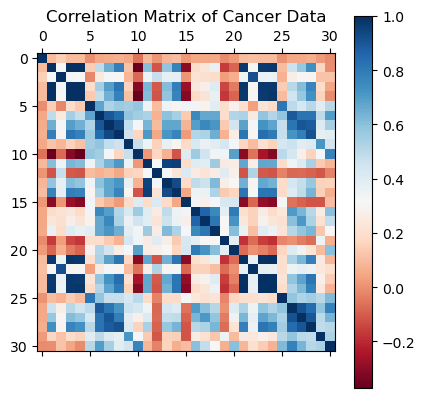

In [74]:

plt.matshow(corr_data, cmap="RdBu")
plt.colorbar()
plt.title("Correlation Matrix of Cancer Data")
plt.show()


In [76]:
import pandas as pd

# Assuming you have the correlation matrix 'corr_data'

def find_correlation(corr_matrix, cutoff=0.85, verbose=True):


    highly_correlated = []
    cols = corr_matrix.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            if abs(corr_matrix.iloc[i, j]) > cutoff:
                highly_correlated.append((cols[i], cols[j]))
                if verbose:
                    print(f"{cols[i]} and {cols[j]} are highly correlated (r = {corr_matrix.iloc[i, j]:.2f})")

    return highly_correlated

highly_corr_vars = find_correlation(corr_data)

print("Highly correlated variables:")
for pair in highly_corr_vars:
    print(pair)


radius_mean and perimeter_mean are highly correlated (r = 1.00)
radius_mean and area_mean are highly correlated (r = 1.00)
radius_mean and radius_worst are highly correlated (r = 0.98)
radius_mean and perimeter_worst are highly correlated (r = 0.97)
radius_mean and area_worst are highly correlated (r = 0.98)
texture_mean and texture_worst are highly correlated (r = 0.92)
perimeter_mean and area_mean are highly correlated (r = 1.00)
perimeter_mean and radius_worst are highly correlated (r = 0.98)
perimeter_mean and perimeter_worst are highly correlated (r = 0.98)
perimeter_mean and area_worst are highly correlated (r = 0.98)
area_mean and radius_worst are highly correlated (r = 0.98)
area_mean and perimeter_worst are highly correlated (r = 0.97)
area_mean and area_worst are highly correlated (r = 0.98)
compactness_mean and concavity_mean are highly correlated (r = 0.89)
compactness_mean and compactness_worst are highly correlated (r = 0.89)
concavity_mean and concave_points_mean are hig

In [78]:
import pandas as pd

# Assuming you have the original DataFrame 'data_cancer'

# Highly correlated columns identified from the output:
highly_corr_cols = [
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "compactness_mean", "concavity_mean", "concave_points_mean",
    "compactness_worst", "concavity_worst", "concave_points_worst",
    "radius_se", "perimeter_se", "area_se", "compactness_se", "concavity_se"
]

# Create the new DataFrame with highly correlated columns:
new_data_cancer = data_cancer[highly_corr_cols]

print("New DataFrame with highly correlated columns:")
print(new_data_cancer.head())


New DataFrame with highly correlated columns:
   radius_mean  texture_mean  perimeter_mean  area_mean  radius_worst  \
0     0.484043      0.463526        0.531173   0.560709      0.494862   
1     0.488419      0.483630        0.532581   0.563741      0.494403   
2     0.487015      0.489449        0.532191   0.562710      0.492649   
3     0.467415      0.488123        0.522347   0.549047      0.477525   
4     0.487982      0.476113        0.532870   0.563508      0.491284   

   texture_worst  perimeter_worst  area_worst  compactness_mean  \
0       0.482782         0.538129    0.567984          0.166161   
1       0.492442         0.535646    0.567675          0.065847   
2       0.495035         0.534962    0.566341          0.114949   
3       0.496126         0.527150    0.554051          0.168438   
4       0.481454         0.534929    0.565517          0.100165   

   concavity_mean  concave_points_mean  compactness_worst  concavity_worst  \
0        0.174119             0.10

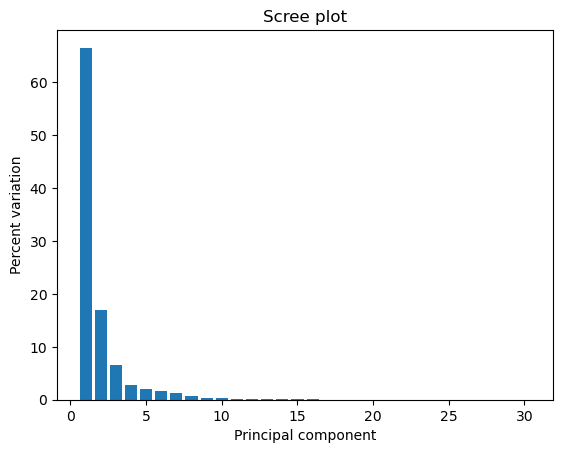

In [83]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_cancer = PCA(n_components=30)
pca_result = pca_cancer.fit_transform(data_cancer.iloc[:, 1:])

pca_var = pca_cancer.explained_variance_
pca_variance = pca_var / np.sum(pca_var)
cum_pca = np.cumsum(pca_variance)


pca_var_perc = np.round(pca_variance * 100, 1)

plt.bar(range(1, len(pca_var_perc) + 1), pca_var_perc, align='center')
plt.title('Scree plot')
plt.xlabel('Principal component')
plt.ylabel('Percent variation')
plt.show()

optimal_n_components = 5


reduced_data = pd.DataFrame(pca_result[:, :optimal_n_components], columns=[f'PC{i}' for i in range(1, optimal_n_components + 1)])



In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'data_cancer' loaded

# Perform PCA (if not already done):
pca_cancer = PCA(n_components=10)  # Keep only 10 PCs based on variance analysis
pca_cancer.fit(data_cancer.iloc[:, 2:31])  # Fit on columns 2 to 31

# Create the DataFrame 'pca_cancer_new':
pca_cancer_new = pd.DataFrame(pca_cancer.transform(data_cancer.iloc[:, 2:31]), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

# Create the plot (code remains the same):
pca_data = pca_cancer_new.iloc[:, :2]  # Select first 2 PCs for visualization
plt.figure(figsize=(8, 6))
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=data_cancer['diagnosis'], alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of Principal Components 1 and 2')
plt.legend()
plt.show()


KeyError: 'diagnosis'

<Figure size 800x600 with 0 Axes>